# 6. SymPy и matplotlib

## 6.1. SymPy
Часть про `SymPy` основана на семинаре Андрея Грозина: http://www.inp.nsk.su/~grozin/python/python7.ipynb


`symPy` - это пакет для символьных вычислений на питоне, подобный системе *Mathematica*. Он работает с выражениями, содержащими символы.

    conda install sympy
    pip install sympy
    
Документация: http://docs.sympy.org/latest/index.html

In [1]:
import sympy as sp
# настроить отображение формул через png
sp.init_printing(use_latex='png')

Основными кирпичиками, из которых строятся выражения, являются символы. Символ имеет имя, которое используется при печати выражений. Объекты класса `Symbol` нужно создавать и присваивать переменным питона, чтобы их можно было использовать. В принципе, имя символа и имя переменной, которой мы присваиваем этот символ - две независимые вещи, и можно написать `abc=Symbol('xyz')`. Но тогда при вводе программы Вы будете использовать `abc`, а при печати результатов `SymPy` будет использовать `xyz`, что приведёт к ненужной путанице. Поэтому лучше, чтобы имя символа совпадало с именем переменной питона, которой он присваивается.

В языках, специально предназначенных для символьных вычислений, таких, как *Mathematica*, если Вы используете переменную, которой ничего не было присвоено, то она автоматически воспринимается как символ с тем же именем. Питон не был изначально предназначен для символьных вычислений. Если Вы используете переменную, которой ничего не было присвоено, Вы получите сообщение об ошибке. Объекты типа `Symbol` нужно создавать явно.

In [2]:
x = sp.Symbol('x')

In [3]:
a = x**2 - 1
print(a)
a

x**2 - 1


Можно определить несколько символов одновременно. Строка разбивается на имена по пробелам.

In [4]:
y, z = sp.symbols('y z')

Подставим вместо $x$ выражение $y+1$.

In [5]:
a.subs(x, y + 1)

### 6.1.1. Многочлены и рациональные функции

`SymPy` не раскрывает скобки автоматически. Для этого используется функция `expand`.

In [6]:
a = (x + y)**2
a

In [7]:
a = sp.expand(a)
print(a)

x**2 + 2*x*y + y**2


Степень многочлена $a$ по $x$.

In [8]:
sp.degree(a, y)

Соберём вместе члены с определёнными степенями $x$.

In [9]:
b = sp.collect(a, x)
print(b)

x**2 + 2*x*y + y**2


Многочлен с целыми коэффициентами можно записать в виде произведения таких многочленов (причём каждый сомножитель уже невозможно расфакторизовать дальше, оставаясь в рамках многочленов с целыми коэффициентами). Существуют эффективные алгоритмы для решения этой задачи.

In [10]:
a = sp.factor(a)
a

`SymPy` не сокращает отношения многочленов на их наибольший общий делитель автоматически. Для этого используется функция `cancel`.

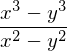

In [11]:
a = (x**3 - y**3) / (x**2 - y**2)
a

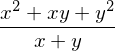

In [12]:
sp.cancel(a)

`SymPy` не приводит суммы рациональных выражений к общему знаменателю автоматически. Для этого используется функция `together`.

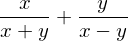

In [13]:
a = y / (x - y) + x / (x + y)
a

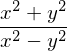

In [14]:
sp.cancel(sp.together(a))

Функция `simplify` пытается переписать выражение *в наиболее простом виде*. Это понятие не имеет чёткого определения (в разных ситуациях *наиболее простыми* могут считаться разные формы выражения), и не существует алгоритма такого упрощения. Функция `symplify` работает эвристически, и невозможно заранее предугадать, какие упрощения она попытается сделать. Поэтому её удобно использовать в интерактивных сессиях, чтобы посмотреть, удастся ли ей записать выражение в каком-нибудь разумном виде, но нежелательно использовать в программах. В них лучше применять более специализированные функции, которые выполняют одно определённое преобразование выражения.

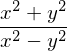

In [15]:
sp.simplify(a)

Разложение на элементарные дроби по отношению к $x$.

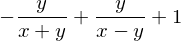

In [16]:
sp.apart(a, x)

Подставим конкретные численные значения вместо переменных $x$ и $y$.

In [17]:
a = a.subs({x: 1, y: 2})
a

А сколько это будет численно?

In [18]:
a.n(100)

### 6.1.2. Элементарные функции

`SymPy` автоматически применяет упрощения элементарных функция (которые справедливы во всех случаях).

In [19]:
sp.cos(-x)

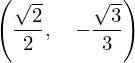

In [20]:
sp.cos(sp.pi / 4), sp.tan(5 * sp.pi / 6)

`SymPy` может работать с числами с плавающей точкой, имеющими сколь угодно большую точность. Вот $\pi$ с 100 значащими цифрами.

In [21]:
print(sp.pi.n(120))
print(sp.E.n(120))

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230665
2.71828182845904523536028747135266249775724709369995957496696762772407663035354759457138217852516642742746639193200305992


`E` - это основание натуральных логарифмов.

In [22]:
sp.log(1), sp.log(sp.E), sp.log(2.72)

In [23]:
sp.exp(sp.log(x)), sp.log(sp.exp(x))

А почему не $x$? Попробуйте подставить $x=2\pi i$.

In [24]:
sp.sqrt(0)

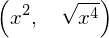

In [25]:
sp.sqrt(x)**4, sp.sqrt(x**4)

А почему не $x^2$? Попробуйте подставить $x=i$.

Символы могут иметь некоторые свойства. Например, они могут быть положительными. Тогда `SymPy` может сильнее упростить квадратные корни.

In [26]:
p, q = sp.symbols('p q', positive=True)
sp.sqrt(p**2)

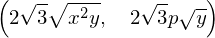

In [27]:
sp.sqrt(12 * x**2 * y), sp.sqrt(12 * p**2 * y)

Пусть символ $n$ будет целым (`I` - это мнимая единица).

In [28]:
n = sp.Symbol('n', integer=True)
sp.exp(2 * sp.pi * sp.I * n)

Метод `rewrite` пытается переписать выражение в терминах заданной функции.

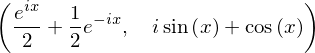

In [29]:
sp.cos(x).rewrite(sp.exp), sp.exp(sp.I * x).rewrite(sp.cos)

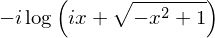

In [30]:
sp.asin(x).rewrite(sp.log)

Функция `trigsimp` пытается переписать тригонометрическое выражение в *наиболее простом виде*. В программах лучше использовать более специализированные функции.

In [31]:
sp.trigsimp(2 * sp.sin(x)**2 + 3 * sp.cos(x)**2)

Функция `expand_trig` разлагает синусы и косинусы сумм и кратных углов.

In [32]:
sp.expand_trig(sp.sin(x - y)), sp.expand_trig(sp.sin(2 * x))

In [33]:
a = sp.expand_log(sp.log(p * q**2))
a

In [34]:
sp.logcombine(a)

Функция `expand_power_exp` переписывает степени, показатели которых - суммы, через произведения степеней.

In [35]:
sp.expand_power_exp(x**(p + q))

Функция `expand_power_base` переписывает степени, основания которых - произведения, через произведения степеней.

In [36]:
sp.expand_power_base((x * y)**n)

Функция `powsimp` выполняет обратные преобразования.

In [37]:
sp.powsimp(sp.exp(x) * sp.exp(2 * y)), sp.powsimp(x**n * y**n)

Можно вводить функции пользователя. Они могут иметь произвольное число аргументов.

In [38]:
f = sp.Function('f')
f(x) + f(x,y)

### 6.1.3. Решение уравнений

In [39]:
a, b, c, d, e, f = sp.symbols('a b c d e f')

Уравнение записывается как функция `Eq` с двумя параметрами. Функция `solve` возврящает список решений.

In [40]:
sp.solve(sp.Eq(a * x - b), x)

Впрочем, можно передать функции `solve` просто выражение. Подразумевается уравнение, что это выражение равно 0.

In [41]:
sp.solve(a * x - b, x)

Квадратное уравнение имеет 2 решения.

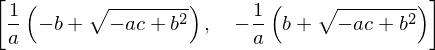

In [42]:
sp.solve(a * x**2 + 2 * b * x + c, x)

Система линейных уравнений.

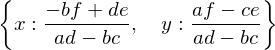

In [43]:
sp.solve([a * x + b * y - e, c * x + d * y - f], [x, y])

Функция `roots` возвращает корни многочлена с их множественностями.

In [44]:
sp.solve(x**3 - 3 * x + 2, x)

### 6.1.4. Производные

In [45]:
a = x * sp.sin(x + y)
sp.diff(a, x)

In [46]:
sp.diff(a, y)

Вторая производная по $x$ и первая по $y$.

In [47]:
sp.diff(a, x, 2, y)

Можно дифференцировать выражения, содержащие неопределённые функции.

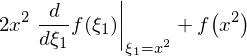

In [48]:
a = x * f(x**2)
b = sp.diff(a, x)
b

### 6.1.5. Интегралы

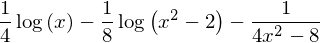

In [49]:
sp.integrate(1 / (x * (x**2 - 2)**2), x)

In [50]:
sp.integrate(1/(sp.exp(x) + 1), x)

In [51]:
sp.integrate(sp.log(x), x)

In [52]:
sp.integrate(x * sp.sin(x), x)

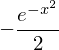

In [53]:
sp.integrate(x * sp.exp(-x**2), x)

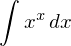

In [54]:
a = sp.integrate(x**x, x)
a

Получился невычисленный интеграл.

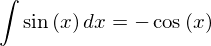

In [55]:
a = sp.Integral(sp.sin(x), x)
sp.Eq(a, a.doit())

Определённые интегралы.

`oo` - это $\infty$.

In [56]:
sp.integrate(sp.exp(-x**2), (x, 0, sp.oo))

In [57]:
sp.integrate(sp.sin(x), (x, 0, sp.pi))

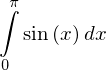

In [58]:
a = sp.Integral(sp.sin(x), (x, 0, sp.pi))
a

In [59]:
a.doit()

### 6.1.6. Пределы

In [60]:
sp.limit((sp.tan(sp.sin(x)) - sp.sin(sp.tan(x))) / x**7, x, 0)

Ну это простой предел, считается разложением числителя и знаменателя в ряды. А вот если в $x=0$ существенно особая точка, дело сложнее. Посчитаем односторонние пределы.

In [61]:
sp.limit((sp.tan(sp.sin(x)) - sp.sin(sp.tan(x))) / (x**7 + sp.exp(-1 / x)), x, 0, '+')

In [62]:
sp.limit((sp.tan(sp.sin(x)) - sp.sin(sp.tan(x))) / (x**7 + sp.exp(-1 / x)), x, 0, '-')

### 6.1.7. Дифференциальные уравнения

In [63]:
t = sp.Symbol('t')
x = sp.Function('x')

Первого порядка.

In [64]:
sp.dsolve(sp.diff(x(t), t) + x(t), x(t))

Второго порядка.

In [65]:
sp.dsolve(sp.diff(x(t), t, 2) + x(t), x(t))

### 6.1.8. Линейная алгебра

In [66]:
a, b, c, d, e, f = sp.symbols('a b c d e f')

Матрицу можно построить из списка списков.

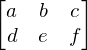

In [67]:
M = sp.Matrix([[a,b,c], [d,e,f]])
M

Можно построить матрицу из функции.

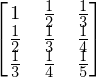

In [68]:
def g(i,j):
    return sp.Rational(1, i + j + 1)
sp.Matrix(3, 3, g)

Или из неопределённой функции.

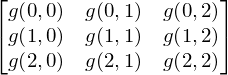

In [69]:
g = sp.Function('g')
M = sp.Matrix(3, 3, g)
M

In [70]:
M[1,2]

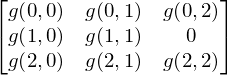

In [71]:
M[1,2]=0
M

In [72]:
M[2,:]

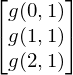

In [73]:
M[:,1]

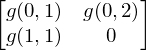

In [74]:
M[0:2,1:3]

Операции с матрицами.

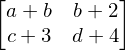

In [75]:
A = sp.Matrix([[a,b],[c,d]])
B = sp.Matrix([[b,2],[3,4]])
A + B

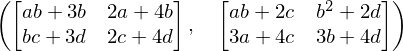

In [76]:
A * B, B * A

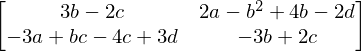

In [77]:
A * B - B * A

In [78]:
sp.det(A)

### 6.1.9. Графики

`SymPy` использует `matplotlib`. Однако он распределяет точки по $x$ адаптивно, а не равномерно.

In [79]:
%matplotlib inline

Одна функция.

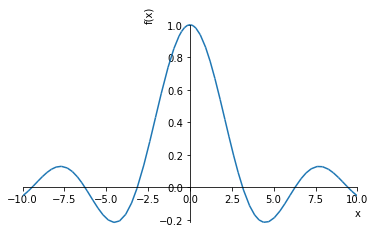

In [80]:
x = sp.Symbol('x')
sp.plot(sp.sin(x) / x, (x, -10, 10))

Несколько функций.

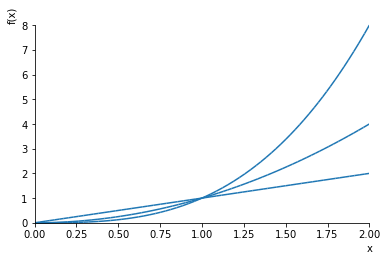

In [81]:
sp.plot(x,  x**2, x**3, (x, 0, 2))

Параметрический график - фигура Лиссажу.

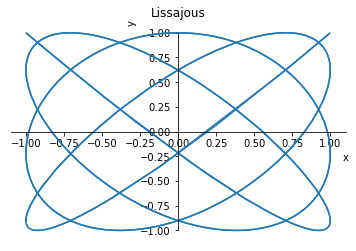

In [82]:
t = sp.Symbol('t')
f = sp.plotting.plot_parametric(sp.sin(7 * t), sp.cos(8 * t), (t, 0, 2 * sp.pi), title='Lissajous', xlabel='x', ylabel='y')

Поверхность. Если она строится не `inline`, а в отдельном окне, то её можно вертеть мышкой.

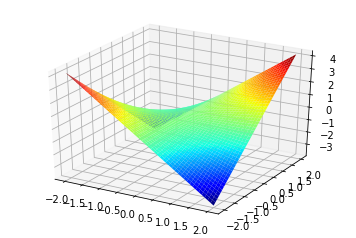

In [83]:
sp.plotting.plot3d(x * y + 0.2, (x, -2, 2), (y, -2, 2))

Несколько поверхностей.

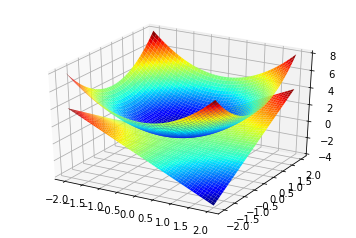

In [84]:
sp.plotting.plot3d(x**2 + y**2, x*y, (x, -2, 2), (y, -2, 2))

Параметрическая пространственная линия - спираль.

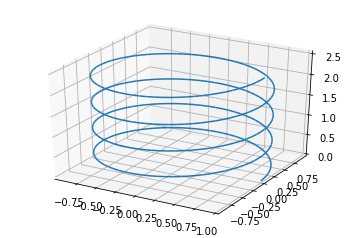

In [85]:
a = 0.1
sp.plotting.plot3d_parametric_line(sp.cos(t), sp.sin(t), a*t, (t, 0, 8 * sp.pi))

Параметрическая поверхность - тор.

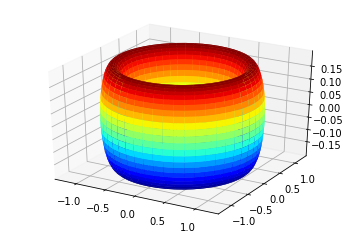

In [86]:
u, v = sp.symbols('u v')
a = 0.2
sp.plotting.plot3d_parametric_surface((1 + a * sp.cos(u)) * sp.cos(v),
                          (1 + a * sp.cos(u)) * sp.sin(v), a * sp.sin(u),
                          (u, 0, 2 * sp.pi), (v, 0, 2 * sp.pi))

## 6.2. matplotlib

matplotlib — модуль для визуализации двухмерных и трехмерных графиков.

    pip install matplotlib
    conda install matplotlib
    
Документация: http://matplotlib.org/2.0.0/contents.html

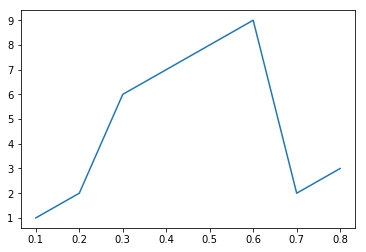

In [87]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y = [1, 2, 6, 7, 8, 9, 2, 3]
_ = pyplot.plot(x, y)

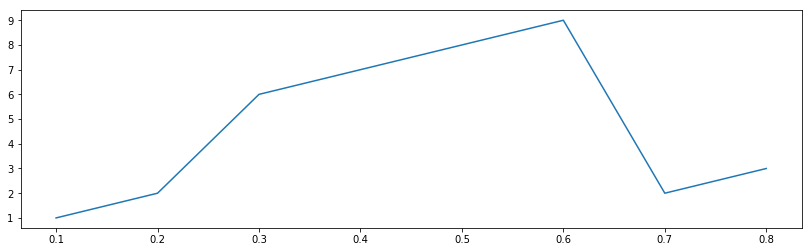

In [88]:
pyplot.rcParams['figure.figsize'] = (14, 4)
_ = pyplot.plot(x, y)

Example http://matplotlib.org/2.0.0/examples/lines_bars_and_markers/line_demo_dash_control.html:

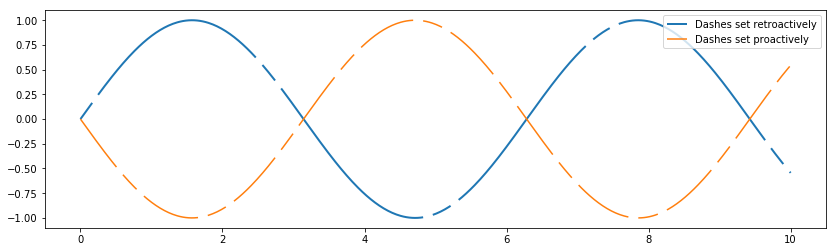

In [89]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(x, np.sin(x), '--', linewidth=2, label='Dashes set retroactively')
line1.set_dashes(dashes)

line2, = ax.plot(x, -1 * np.sin(x), dashes=[30, 5, 10, 5], label='Dashes set proactively')

_ = ax.legend(loc='upper right')

Полярные координаты:

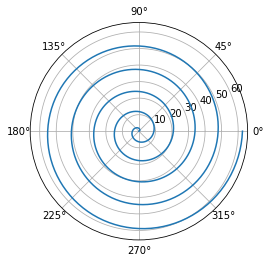

In [90]:
import math
import numpy
import matplotlib.pyplot as plt

x = numpy.linspace(0, 10 * math.pi, 1000)
y = x ** 1.2
_ = plt.polar(x, y)

Пример http://matplotlib.org/2.0.0/examples/lines_bars_and_markers/scatter_with_legend.html:

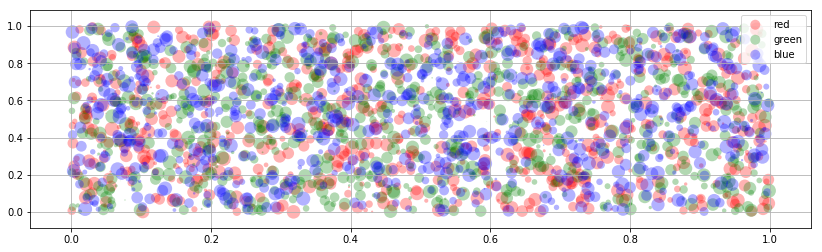

In [91]:
import matplotlib.pyplot as plt
from numpy.random import rand

fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = rand(2, n)
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Пример http://matplotlib.org/2.0.0/examples/statistics/histogram_demo_features.html:

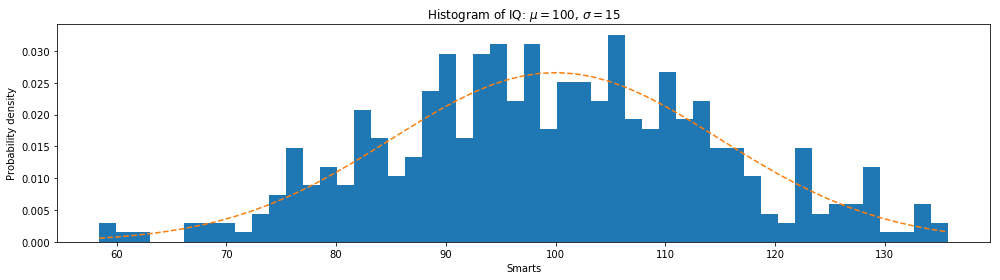

In [92]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

Пример http://matplotlib.org/2.0.0/examples/pylab_examples/contour_demo.html:

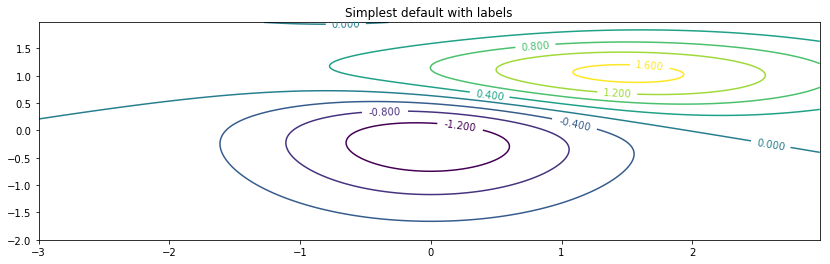

In [93]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
_ = plt.title('Simplest default with labels')

Пример http://matplotlib.org/2.0.0/examples/mplot3d/offset_demo.html:

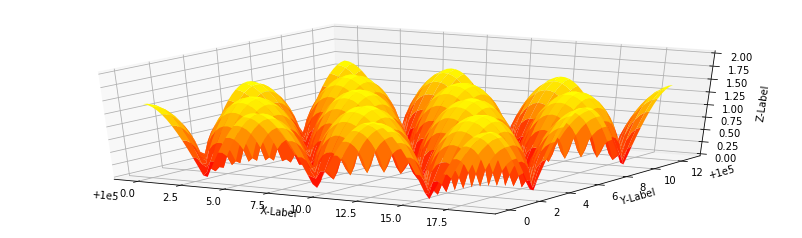

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn')
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
_ = ax.set_zlim(0, 2)

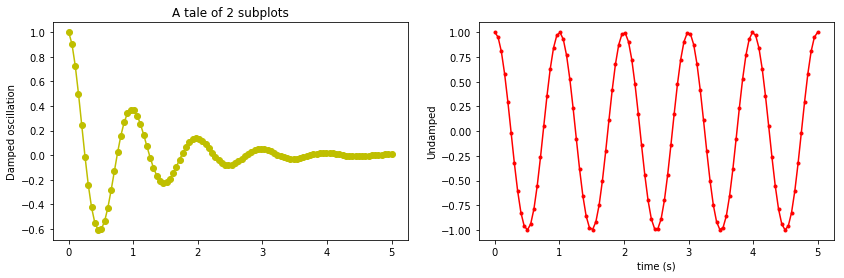

In [95]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0, 100)
x2 = np.linspace(0.0, 5.0, 100)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

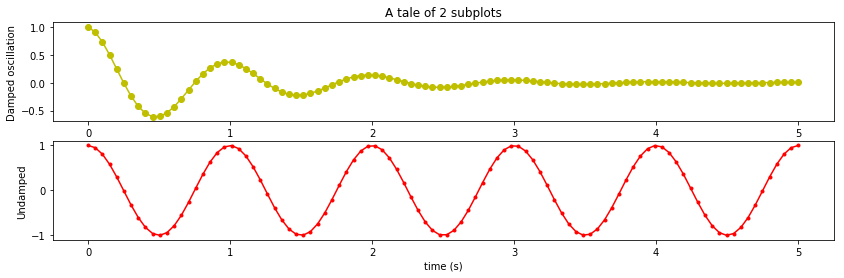

In [96]:
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

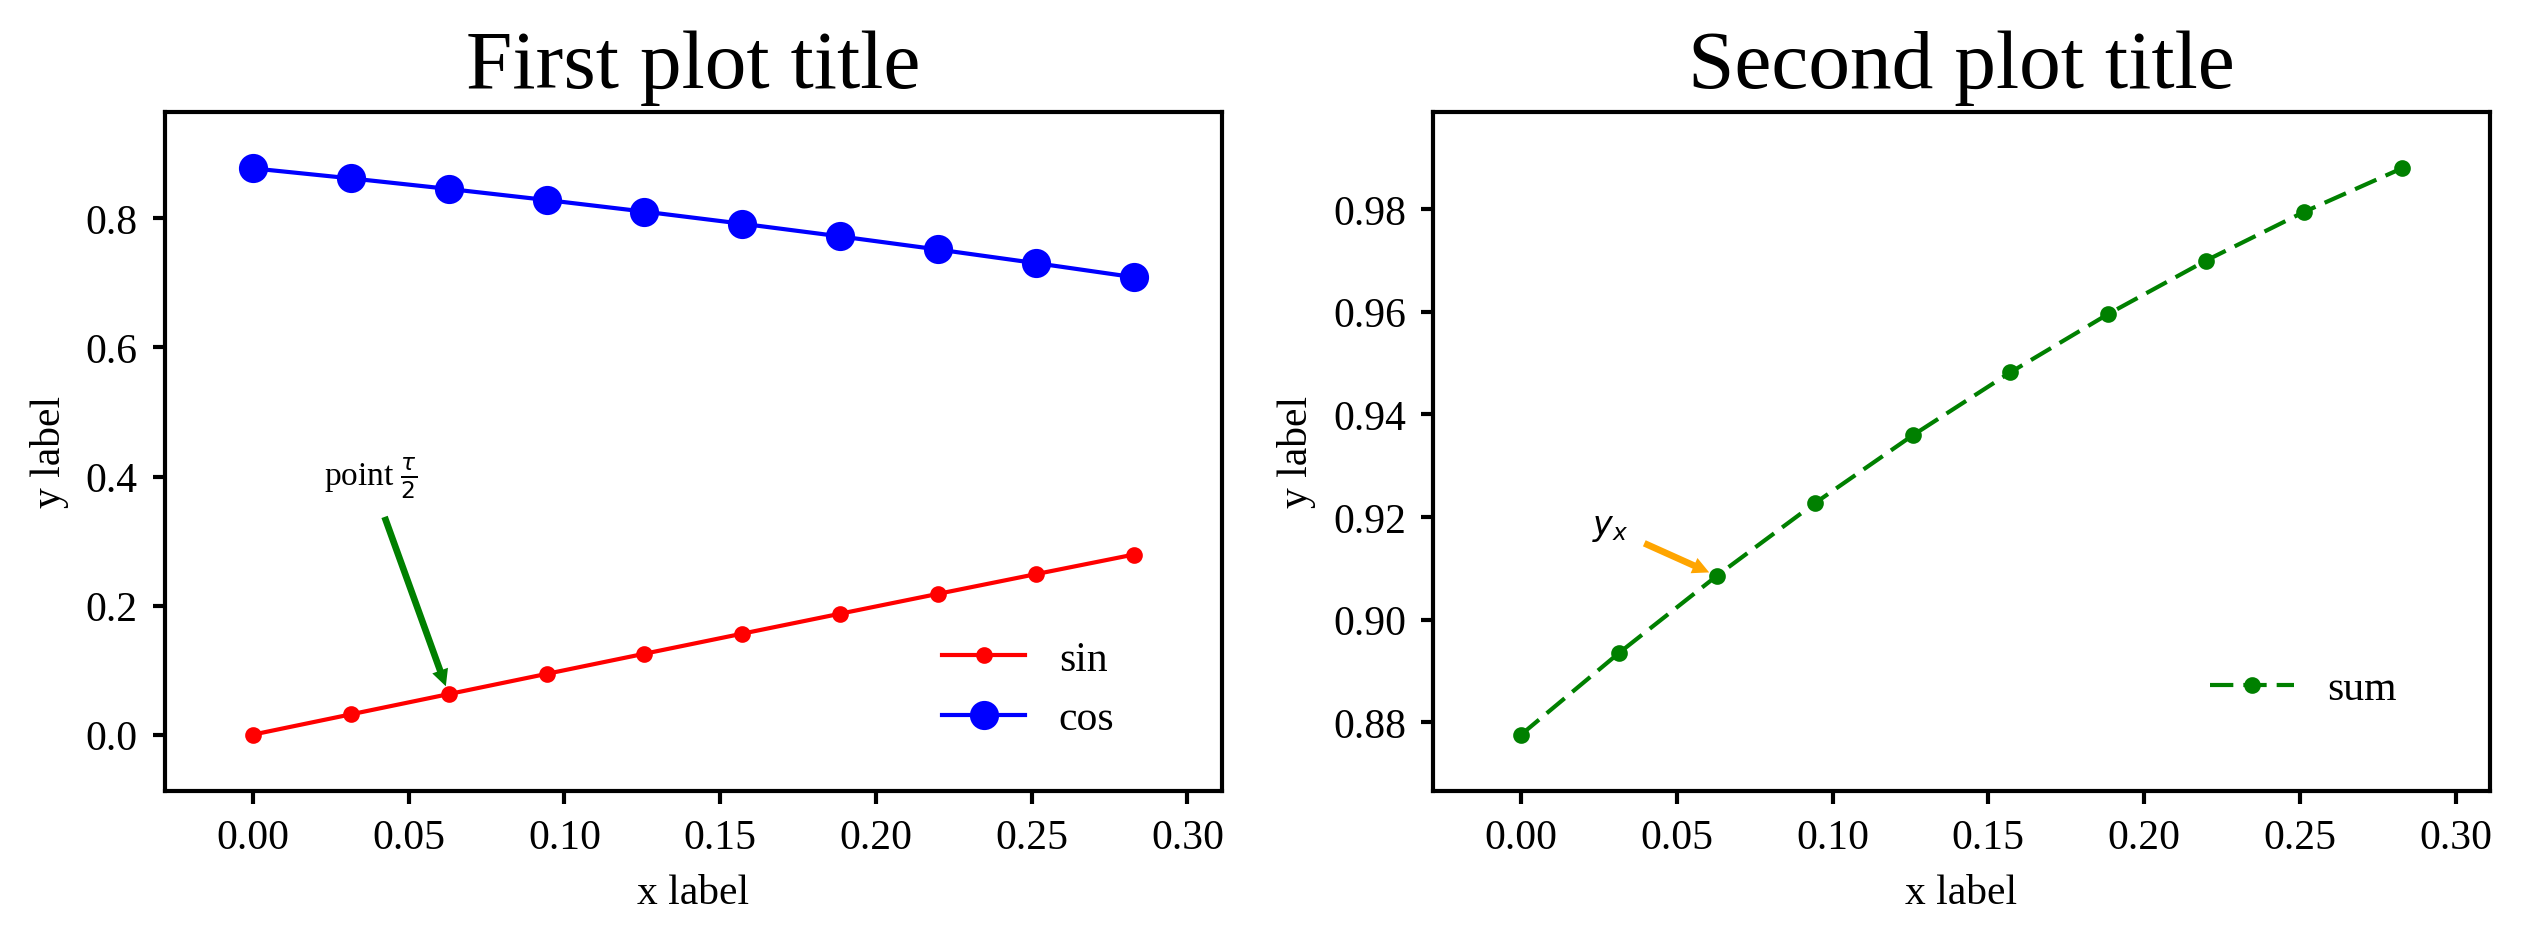

In [97]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['axes.linewidth'] = 1

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

x = [0.01 * math.pi * xi for xi in range(10)]
y1 = [math.sin(xi) for xi in x]
y2 = [math.cos(xi + 0.5) for xi in x]
y3 = [math.cos(xi + 0.5) + math.sin(xi) for xi in x]

# begin subplots region
plt.subplot(121)
plt.gca().margins(0.1, 0.1)
plt.plot(x, y1, linestyle='-', marker='.', linewidth=1, color='r', label='sin')
plt.plot(x, y2, linestyle='-', marker='o', linewidth=1, color='b', label='cos')

plt.gca().annotate(u'point $\\frac{\\tau}{2}$', xy=(x[2], y1[2]),  xycoords='data',
                xytext=(-30, 50), textcoords='offset points', size=8,
                arrowprops=dict(arrowstyle='simple', fc='g', ec='none'))

plt.xlabel(u'x label')
plt.ylabel(u'y label')
plt.title(u'First plot title')

plt.gca().legend(bbox_to_anchor = (0.7, 0.15))

plt.subplot(122)
plt.gca().margins(0.1, 0.1)
plt.plot(x, y3, linestyle='--', marker='.', linewidth=1, color='g', label='sum')

plt.gca().annotate(u'$y_x$', xy=(x[2], y3[2]),  xycoords='data',
                xytext=(-30, 10), textcoords='offset points', size=8,
                arrowprops=dict(arrowstyle='simple', fc='orange', ec='none'))

plt.xlabel(u'x label')
plt.ylabel(u'y label')
plt.title(u'Second plot title')

_ = plt.gca().legend(bbox_to_anchor = (0.7, 0.15))

## 6.3. seaborn

Seaborn основан на matplotlib и ориентирован на статистические графики.

    pip install seaborn

Документация: http://seaborn.pydata.org/introduction.html

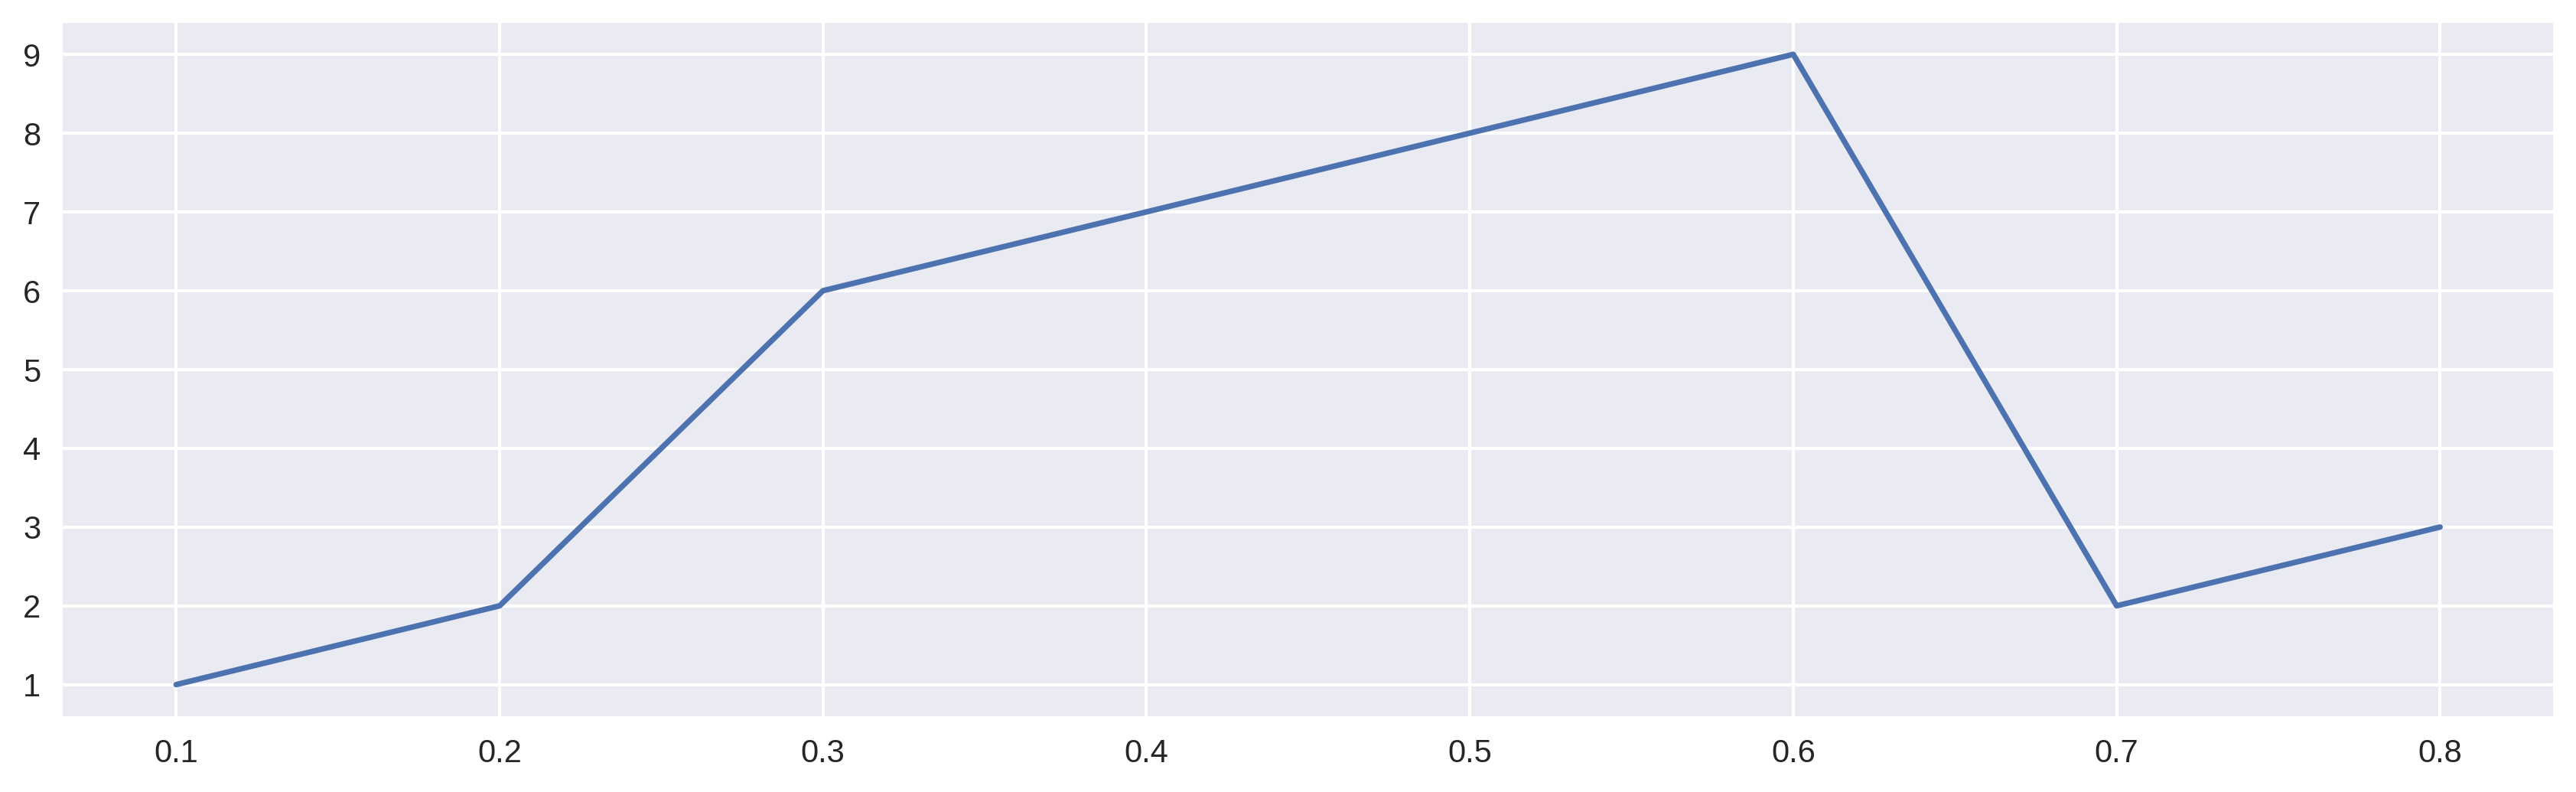

In [98]:
import seaborn
pyplot.rcParams['figure.figsize'] = (14, 4)
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y = [1, 2, 6, 7, 8, 9, 2, 3]
_ = pyplot.plot(x, y)

   timepoint  ROI  subject  BOLD signal
0        0.0  IPS        0     0.513433
1        0.0  IPS        1    -0.414368
2        0.0  IPS        2     0.214695
3        0.0  IPS        3     0.814809
4        0.0  IPS        4    -0.894992


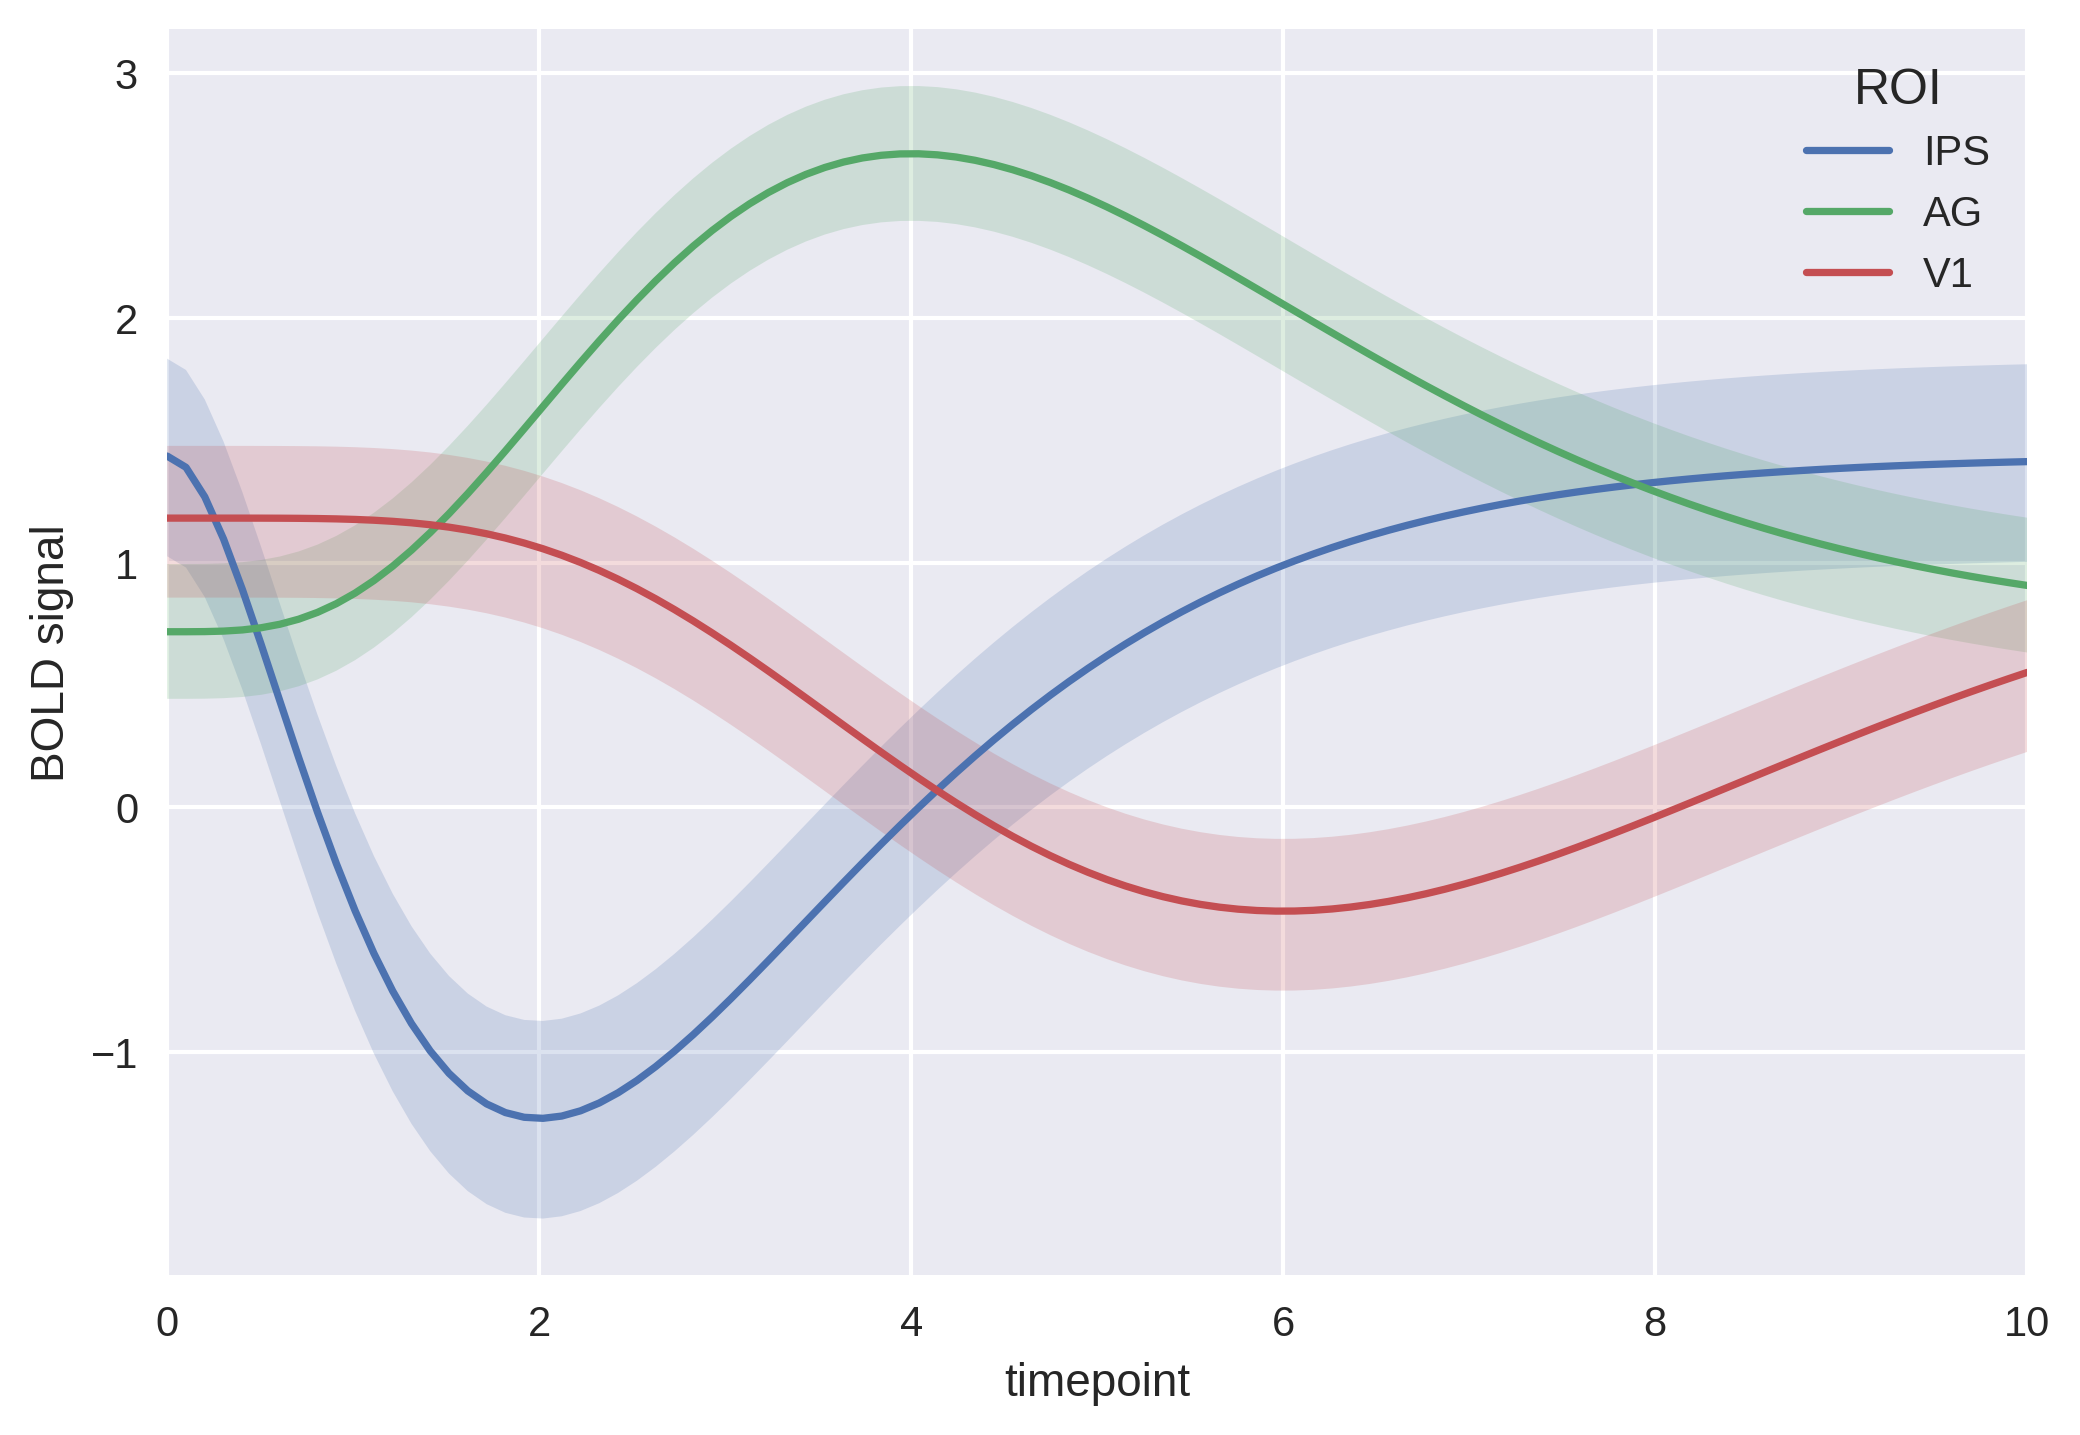

In [99]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")
print(gammas.head())

# Plot the response with standard error
_ = sns.tsplot(data=gammas, time="timepoint", unit="subject", condition="ROI", value="BOLD signal")

Пример http://seaborn.pydata.org/examples/multiple_joint_kde.html:

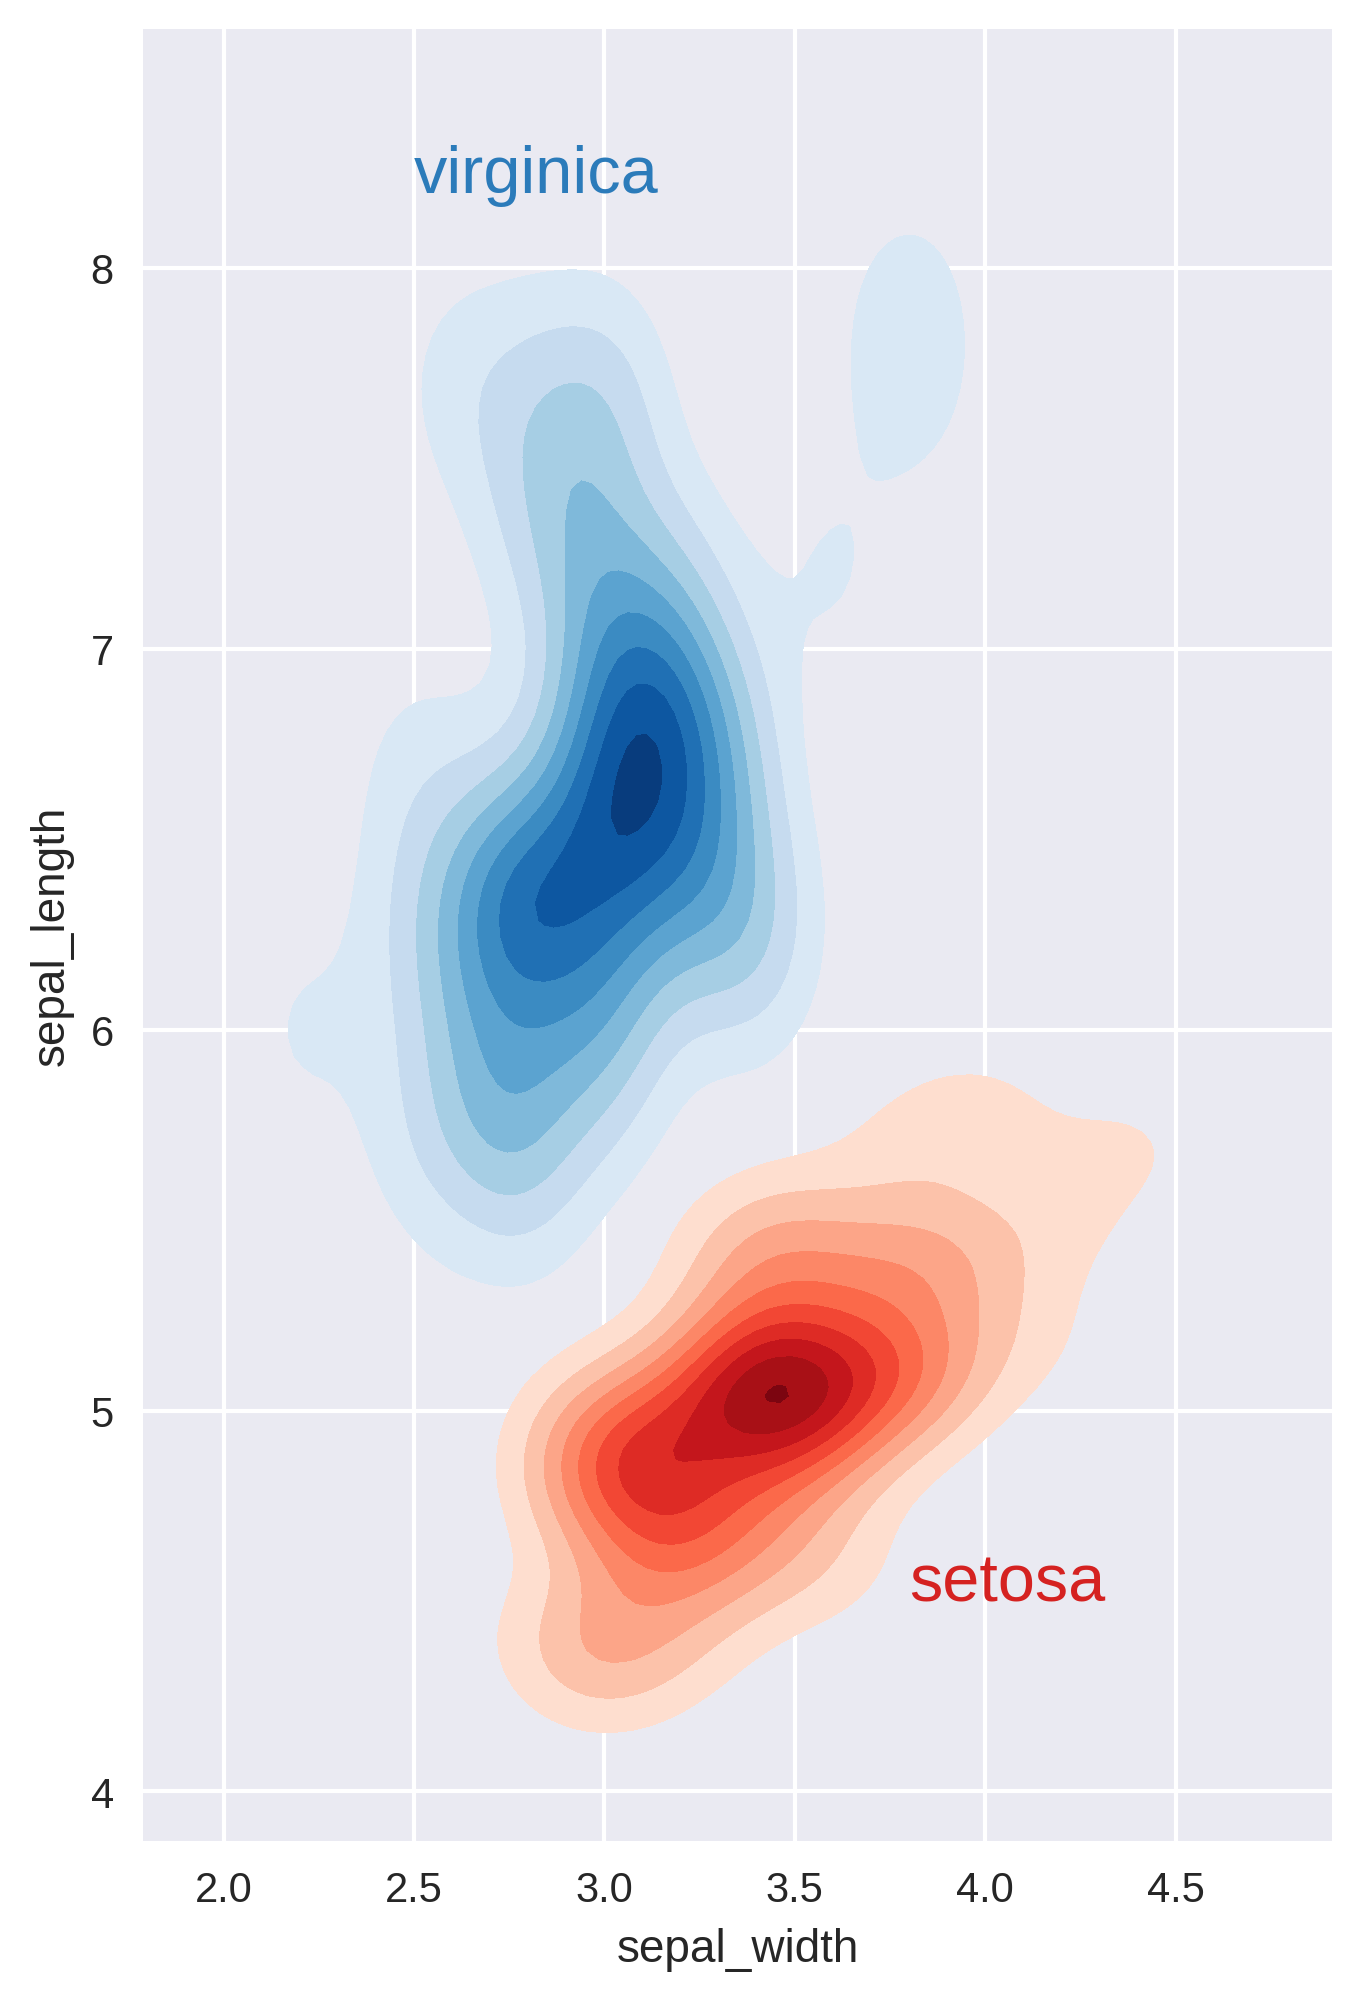

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
_ = ax.text(3.8, 4.5, "setosa", size=16, color=red)